### Context:
Pinjaman merupakan tipe produk kredit yang mana sejumlah uang dipinjamkan kepada pihak lain dengan imbalan berupa pengembalian di masa depan. Pada banyak kasus, pemberi pinjaman atau kreditur juga menambahkan bunga atau biaya jasa keuangan terhadap jumlah pinjaman dasar dan penerima pinjaman atau debitur harus membayarkan keseluruhannya. Pinjaman juga bisa untuk kepentingan spesifik berjangka, sekali bayar, atau sebagai kredit terbuka hingga batas atas (limit).
Produk perbankan tidak akan pernah lepas dari risiko, termasuk produk kredit. Dikutip dari penelitian [Sandar Win](https://link.springer.com/article/10.1007/s10368-018-0412-z) bahwa risiko kredit/credit risk adalah prospek dimana debitur akan gagal memenuhi tanggung jawab pada syarat dan ketentuan yang telah disetujui. Kegagalan manajemen risiko kredit akan mengakibatkan lebih dari kerugian di sisi akuntansi perusahaan, seperti biaya kesempatan (opportunity cost), biaya transaksional, dan pengeluaran-pengeluaran yang berhubungan dengan aset non-performing (NPA)

### Business Problems:
   Sebuah bank di Amerika Serikat memiliki produk perbankan berupa pinjaman modal untuk pembiayaan perumahan yang memungkinkan seorang nasabah membeli rumah dan membayar cicilan kepada bank. Bank telah berpengalaman dalam menjual produk jasa keuangan memiliki data nasabah yang meminjam atau debitur beserta jumlah pinjaman yang disetujui setelah beragam pertimbangan. Secara konvensional, proses pertimbangan disebut sebagai analisis kredit/credit analysis. Analisis kredit menurut artikel [Corporate Finance](https://corporatefinanceinstitute.com/resources/knowledge/credit/credit-analysis-process/#:~:text=The%20credit%20analysis%20process%20is,to%20extend%20to%20the%20borrower.) adalah proses yang berlangsung sejak pengumpulan data, analisis data hingga keputusan pinjaman (diterima atau ditolak). Keseluruhan proses ini memakan waktu mingguan hingga bulanan.

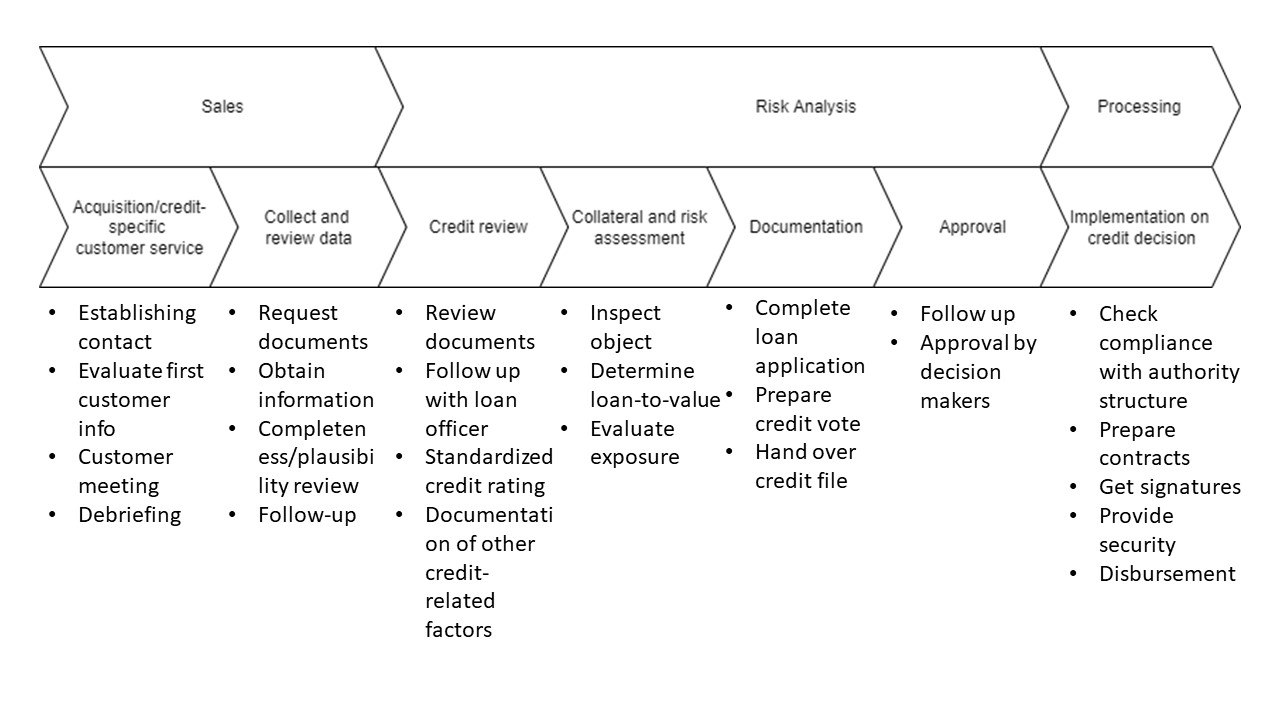

Segera setelah nasabah mengajukan permohonan kredit beserta dokumen yang dibutuhkan, bank akan memeriksa dokumen sekiranya selama 3-5 hari kerja, bahkan lebih lama jika dokumen tidak lengkap. Setelah proses ini bank menjalankan asesmen untuk valuasi properti yang diajukan nasabah, asuransi kredit jika pengajuan kredit nasabah diatas 80% harga properti, sampai persetujuan kredit pada nasabah secara rata-rata memakan waktu 4-6 minggu .
[sumber](https://www.loans.com.au/home-loans/how-long-does-it-take-to-get-a-home-loan-approval#:~:text=The%20average%20time%20for%20formal,reaching%20settlement%20on%20the%20property.)

Metode machine learning yang tepat dapat menjadi alat untuk otomasi proses analisis kredit ini. Dilansir dari [McKinsey](https://www.mckinsey.com/business-functions/risk-and-resilience/our-insights/designing-next-generation-credit-decisioning-models) penerapan model yang high-performance di industri perbankan dapat mendukung keputusan pemberian kredit dengan objektif. Faktanya perbankan dan perusahaan pembiayaan yang menerapkan model baru ini mengalami peningkatan pendapatan, pengurangan kredit yang hilang, dan meningkatnya efisiensi yang berasal dari pengambilan keputusan yang presisi dan terotomasi.   

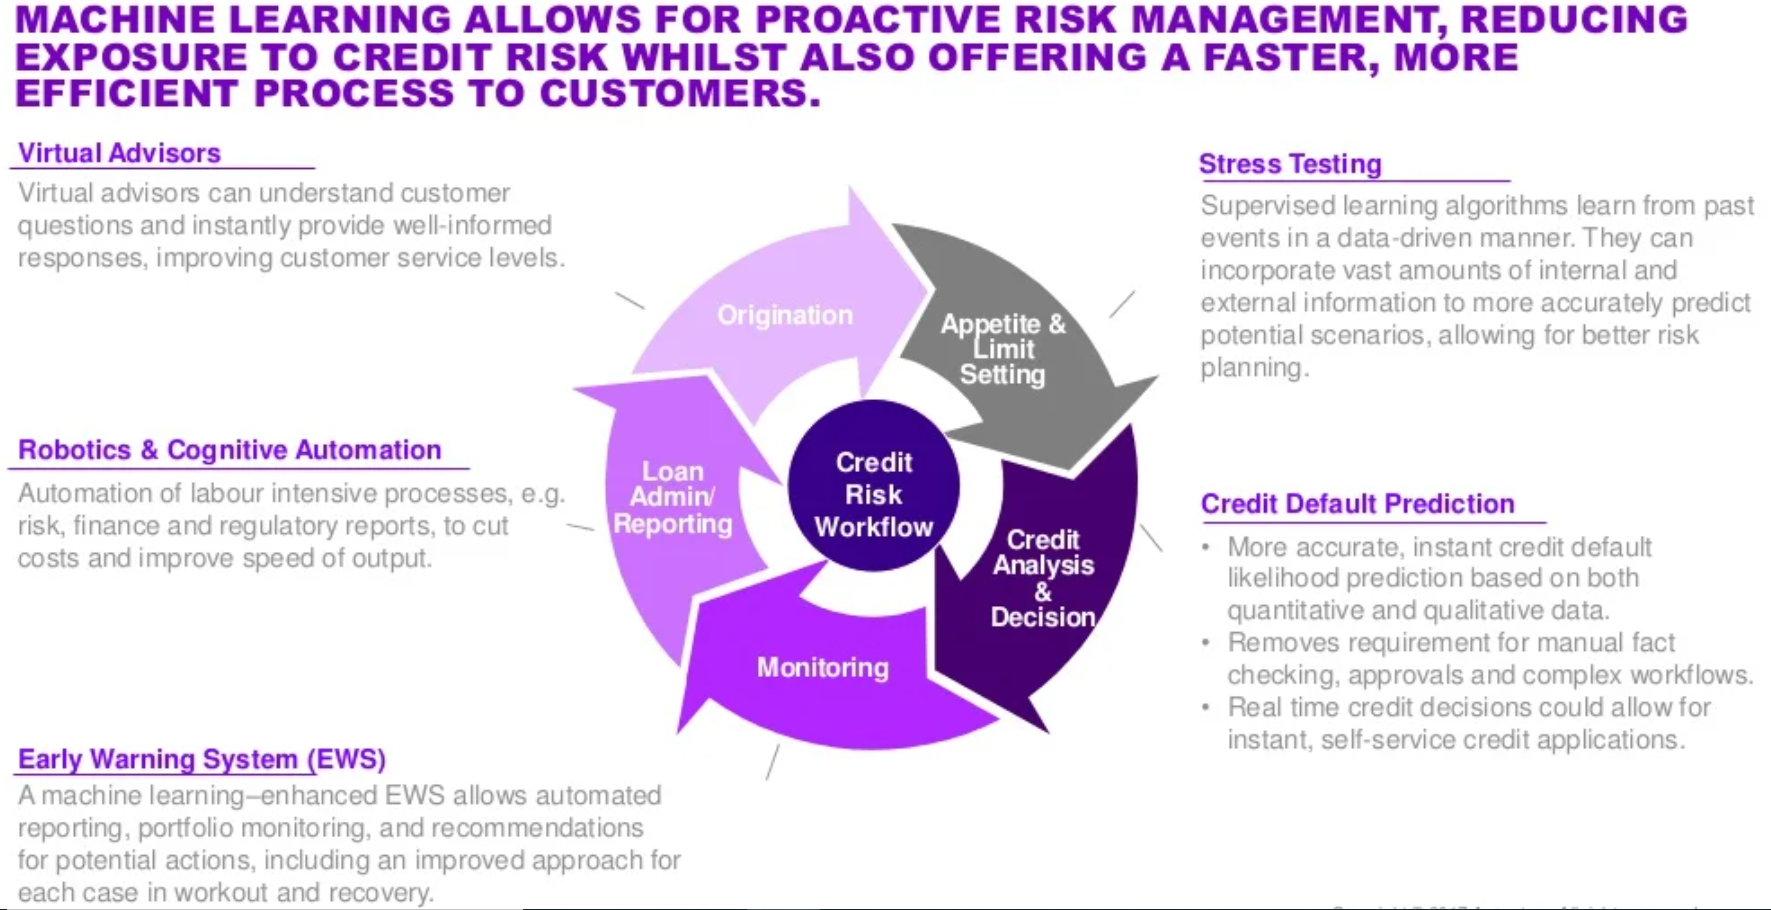

### Goals:
- Meningkatkan pendapatan Bank dengan kredit yang lancar
- Mengurangi cost/expense dari proses analisa kredit 
- Efisiensi waktu keputusan persetujuan hutang dengan memberikan support berupa prediksi.

### Import Data and Library

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
print("Dataframe terdiri dari", df.shape[0], "baris dan", df.shape[1], "kolom")

Dataframe terdiri dari 30000 baris dan 24 kolom


In [4]:
df.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

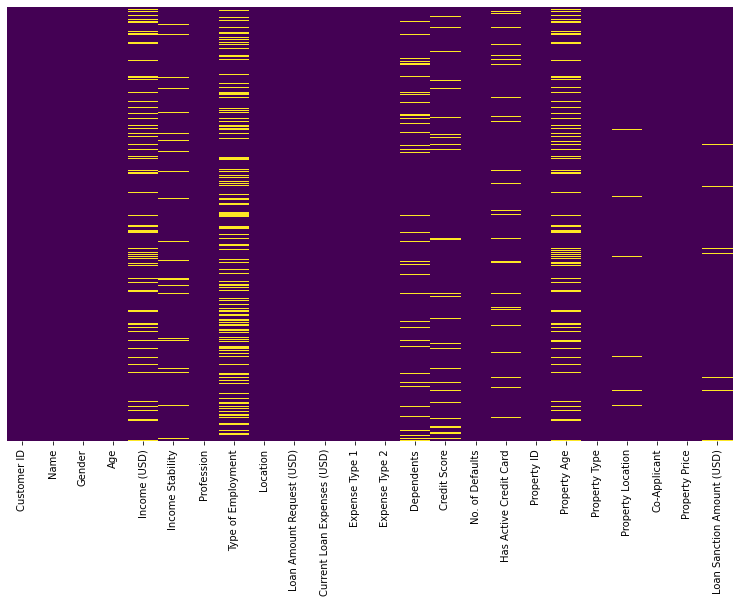

In [5]:
plt.figure(figsize=(13, 8))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [6]:
loanDesc = []

for i in df.columns:
    loanDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [7]:
pd.DataFrame(data = loanDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,Customer ID,object,0,0.00,30000,"[C-10756, C-6048]"
1,Name,object,0,0.00,30000,"[Aletha Ruder, Jackson Ortego]"
2,Gender,object,53,0.18,2,"[F, M]"
3,Age,int64,0,0.00,48,"[61, 57]"
4,Income (USD),float64,4576,15.25,24429,"[2823.92, 3572.11]"
5,Income Stability,object,1683,5.61,2,"[High, nan]"
6,Profession,object,0,0.00,8,"[Pensioner, Student]"
7,Type of Employment,object,7270,24.23,18,"[Accountants, Realty agents]"
8,Location,object,0,0.00,3,"[Semi-Urban, Urban]"
9,Loan Amount Request (USD),float64,0,0.00,29982,"[35542.12, 139953.03]"


Dataframe ini memiliki beberapa kolom yang berisi data null/NaN dan akan diatasi sesuai keperluan modelling selanjutnya.

Kolom-kolom yang ada dalam dataframe ini terdiri atas:
1. Customer ID : nomor identifikasi nasabah
1. Name : nama nasabah
2. Gender : Jenis kelamin nasabah
3. Age : umur nasabah
4. Income (USD) : pendapatan nasabah dalam USD
5. Income Stability : kategori penilaian kestabilan pendapatan
6. Profession : kategori profesi nasabah
7. Type of Employment : kategori tipe kepegawaian nasabah
8. Location : kategori wilayah tempat tinggal
9. Loan Amount Request (USD) : jumlah permohonan peminjaman
10. Current Loan Expense (USD) : pinjaman yang telah digunakan
11. Expense Type 1 : Secure Loan (ada jaminan)
12. Expense Type 2 : Unsecure Loan (tidak pakai jaminan)
13. Dependents : Jumlah pertanggungan nasabah (orang)
14. Credit Score : suatu angka yang mencerminkan reputasi keuangan individu atau lembaga dalam memenuhi kewajiban keuangannya. Umumnya angka ini berkisar antara 250 hingga 900. Semakin tinggi score, semakin rendah risiko kreditnya. Demikian pula sebaliknya.
15. No. of Defaults : Kategori nasabah yang pernah gagal bayar (0: tidak pernah, 1: pernah)
16. Has Active Credit Card : kategori nasabah yang memiliki kartu kredit atau tidak
17. Property ID : identifikasi properti yang dimiliki, kode internal
18. Property Age : Umur properti
19. Property Type : kategori properti yang diajukan nasabah (1. Residential · 2. Commercial · 3. Industrial · 4. Land.)
20. Property Location : kategori lokasi properti
21. Co-Applicant : jumlah orang yang ikut menjadi peminjam (penanggung jawab)
22. Property Price : harga properti nasabah
23. Loan Sanction Amount (USD) : denda yang harus dibayarkan nasabah

In [8]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


Dengan memperhatikan tabel di atas, diketahui bahwa beberapa baris numerik memiliki nilai -999, perlu dihilangkan karena dianggap sebagai error.

In [9]:
#menghilangkan baris data dengan value negatif
df= df[(df['Current Loan Expenses (USD)']>=0) & (df['Co-Applicant']>=0) & (df['Property Price']>=0) & (df['Loan Sanction Amount (USD)']>=0)]
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [10]:
df.describe()
#sudah tidak ada nilai negatif

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,28515.000000,2.430900e+04,28515.000000,28515.000000,26217.000000,26954.000000,28515.000000,28515.000000,2.405300e+04,28515.000000,28515.000000,2.851500e+04,28515.000000
mean,40.118254,2.633074e+03,88844.613439,409.230997,2.254224,740.082980,0.193828,501.765913,2.633172e+03,2.460214,0.852008,1.333104e+05,47998.536781
std,16.063439,1.151435e+04,59510.095361,217.659666,0.951738,72.157448,0.395303,288.134050,1.157424e+04,1.118679,0.355099,9.289111e+04,48256.449314
min,18.000000,3.777000e+02,6048.240000,33.760000,1.000000,580.850000,0.000000,1.000000,3.777000e+02,1.000000,0.000000,7.265950e+03,0.000000
25%,25.000000,1.649230e+03,41244.350000,250.810000,2.000000,682.060000,0.000000,251.000000,1.648560e+03,1.000000,1.000000,6.195589e+04,0.000000
50%,40.000000,2.222400e+03,75093.730000,376.520000,2.000000,740.120000,0.000000,504.000000,2.223300e+03,2.000000,1.000000,1.112739e+05,35754.270000
75%,55.000000,3.089460e+03,119960.155000,522.450000,3.000000,799.360000,0.000000,751.000000,3.090130e+03,3.000000,1.000000,1.800594e+05,74644.730000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [11]:
print("Dataframe terdiri dari", df.shape[0], "baris dan", df.shape[1], "kolom")

Dataframe terdiri dari 28515 baris dan 24 kolom


In [12]:
df.isna().sum()

Customer ID                       0
Name                              0
Gender                           51
Age                               0
Income (USD)                   4206
Income Stability               1553
Profession                        0
Type of Employment             6942
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2298
Credit Score                   1561
No. of Defaults                   0
Has Active Credit Card         1465
Property ID                       0
Property Age                   4462
Property Type                     0
Property Location               321
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

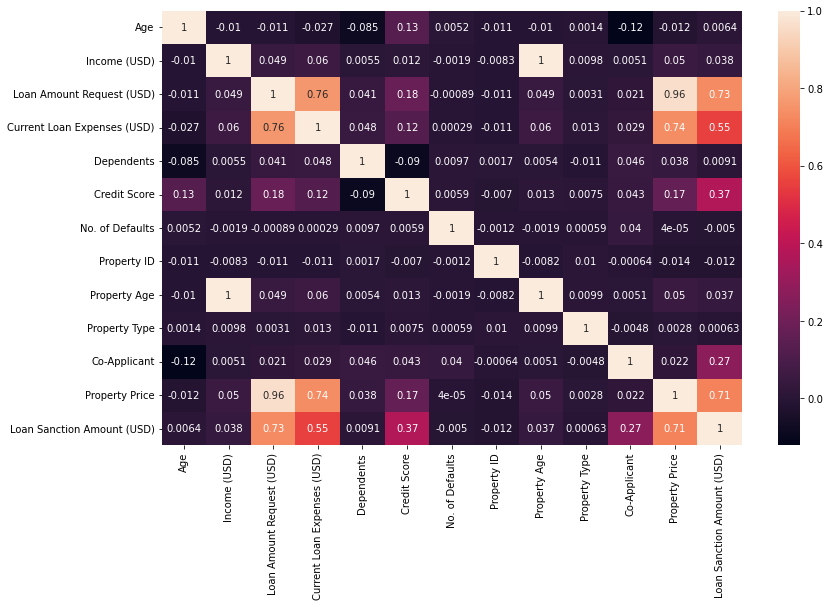

In [13]:
plt.figure(figsize=(13, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df_nona = df.dropna()
df_nona.shape

(14670, 24)

Jika drop/menghilangkan semua nilai null, maka baris dataframe tereduksi hingga setengahnya. Hal ini perlu dihindari karena dapat menyebabkan model underfit saat testing dan bias.

### Exploratory Data Analysis
Fase analisis ini dilakukan untuk mendapatkan insight/gambaran mengenai pola keputusan hutang dan nasabah yang melakukan pengajuan hutang. Sehingga data akan dipahami dan secara objektif membangun model machine learning.

#### A. Persetujuan Pinjaman dan Biaya yang Dikeluarkan Bank
1. Berapa presentase permohonan pinjaman yang disetujui dan tidak disetujui bank?
2. Berapa biaya yang dikeluarkan bank di kredit yang disetujui?
3. Berapa biaya yang dikeluarkan bank di kredit yang tidak disetujui?

#### B. Analisis Karakteristik Properti dan Persetujuan Pinjaman
1. Bagaimana karakteristik umur properti yang diajukan mempengaruhi pinjaman yang disetujui bank?
2. Bagaimana karakteristik tipe properti yang diajukan mempengaruhi pinjaman yang disetujui bank?
3. Bagaimana karakteristik lokasi properti yang diajukan mempengaruhi pinjaman yang disetujui bank?
4. Bagaimana karakteristik harga properti yang diajukan mempengaruhi pinjaman yang disetujui bank?

#### C. Analisis Karakteristik Nasabah dan Persetujuan Pinjaman
1. Bagaimana karakteristik umur nasabah mempengaruhi pinjaman yang disetujui bank?
2. Bagaimana karakteristik pendapatan nasabah mempengaruhi pinjaman yang disetujui bank?
3. Bagaimana karakteristik stabilitas pendapatan nasabah mempengaruhi pinjaman yang disetujui bank?
4. Bagaimana karakteristik profesi nasabah mempengaruhi pinjaman yang disetujui bank?
5. Bagaimana karakteristik tipe kepegawaian nasabah mempengaruhi pinjaman yang disetujui bank?
6. Bagaimana karakteristik lokasi nasabah mempengaruhi pinjaman yang disetujui bank?
7. Bagaimana karakteristik pengajuan pinjaman nasabah mempengaruhi pinjaman yang disetujui bank?
8. Bagaimana karakteristik Expense Type nasabah mempengaruhi pinjaman yang disetujui bank?
9. Bagaimana karakteristik pertanggungan nasabah mempengaruhi pinjaman yang disetujui bank?
10. Bagaimana karakteristik credit score nasabah mempengaruhi pinjaman yang disetujui bank?
11. Bagaimana karakteristik histori gagal bayar nasabah mempengaruhi pinjaman yang disetujui bank?
12. Bagaimana karakteristik kepemilikan kartu kredit nasabah mempengaruhi pinjaman yang disetujui bank?
13. Bagaimana karakteristik co-applicant nasabah mempengaruhi pinjaman yang disetujui bank?

Untuk keperluan analisis selanjutnya, ditambahkan kolom baru yaitu `is_loaned` yang berisi data 0 jika nasabah tidak diberi pinjaman, dan 1 jika nasabah diberi pinjaman

In [15]:
df['is_loaned'] = np.where(df['Loan Sanction Amount (USD)']!= 0, 1, 0)
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),is_loaned
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18,1
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98,1
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43,1
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54,1
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28,1


Memeriksa distribusi data target `Loan Sanction Amount (USD)` dan nilai Null jika ada dalam kolom target

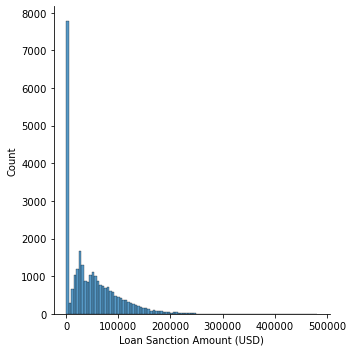

In [16]:
sns.displot(df, x="Loan Sanction Amount (USD)")

In [17]:
#Memeriksa data yang Null
print('Terdapat nilai null/NaN dalam data Loan Sanction Amount sebanyak', df['Loan Sanction Amount (USD)'].isna().sum())

Terdapat nilai null/NaN dalam data Loan Sanction Amount sebanyak 0


### A. Persetujuan Pinjaman dan Biaya yang Dikeluarkan Bank
#### 1. Persentase nasabah yang tidak mendapat pinjaman/ Loan Sanction Amount (USD) = 0 dan nasabah yang mendapat pinjaman

In [18]:
df_zero = df[df['Loan Sanction Amount (USD)'] == 0]
print('Terdapat',df_zero.shape[0],'nasabah atau ',round((df_zero.shape[0]/df.shape[0])*100, 2),'% tidak mendapat pinjaman. Sebanyak',round(100-round((df_zero.shape[0]/df.shape[0])*100, 2),2),'% nasabah mendapat pinjaman')

Terdapat 7758 nasabah atau  27.21 % tidak mendapat pinjaman. Sebanyak 72.79 % nasabah mendapat pinjaman


#### 2. Total biaya yang dikeluarkan bank untuk kredit yang disetujui

In [19]:
df_acc = df[df['Loan Sanction Amount (USD)'] > 0]
print("Biaya yang dikeluarkan bank untuk seluruh kredit yang disetujui USD",round(df_acc["Current Loan Expenses (USD)"].sum()), "rata-rata USD ", round(df_acc["Current Loan Expenses (USD)"].sum()/len(df_acc)),"tiap nasabah. Dengan kredit yang disetujui sejumlah USD", round(df_acc['Loan Sanction Amount (USD)'].sum()))

Biaya yang dikeluarkan bank untuk seluruh kredit yang disetujui USD 8632703 rata-rata USD  416 tiap nasabah. Dengan kredit yang disetujui sejumlah USD 1368678276


#### 3. Total biaya yang dikeluarkan bank untuk kredit yang tidak disetujui

In [20]:
print("Biaya yang dikeluarkan bank untuk seluruh kredit yang tidak disetujui USD",round(df_zero["Current Loan Expenses (USD)"].sum()), "rata-rata USD ", round(df_zero["Current Loan Expenses (USD)"].sum()/len(df_zero)),"tiap nasabah")

Biaya yang dikeluarkan bank untuk seluruh kredit yang tidak disetujui USD 3036519 rata-rata USD  391 tiap nasabah


### Insights A:
- Biaya yang dikeluarkan oleh bank ketika memproses pengajuan kredit nasabah secara rata-rata sama yaitu +- USD 400
- Biaya yang sudah dikeluarkan bank untuk kredit yang tidak disetujui tidak akan mengalami pengembalian, sehingga bukan biaya investasi namun merupakan beban. Hal ini dapat diminimalisir dengan model machine learning yang secara cepat dan efisien memprediksi pengajuan nasabah yang disetujui atau tidak

### B. Analisis Karakteristik Properti dan Persetujuan Pinjaman
#### 1. Umur properti dan pengaruhnya terhadap persetujuan hutang bank.

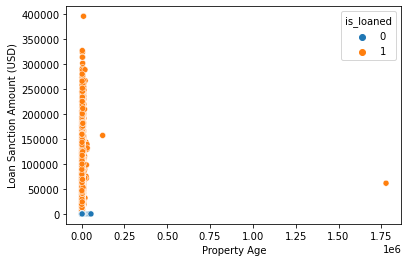

In [21]:
sns.scatterplot(data=df, x="Property Age", y="Loan Sanction Amount (USD)", hue="is_loaned");

Umur properti tidak berelasi dengan hutang yang diberikan bank.

#### 2. Tipe properti dan pengaruhnya terhadap persetujuan hutang bank

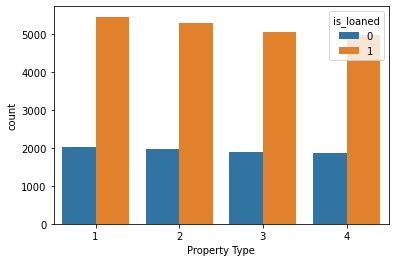

In [22]:
sns.countplot(x=df["Property Type"], hue=df["is_loaned"]);

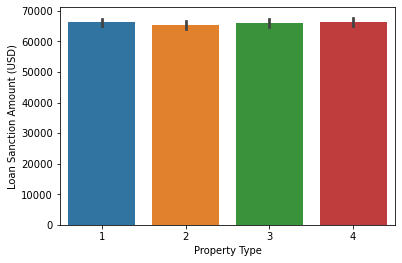

In [23]:
# Rata-rata pinjaman yang diberikan bank untuk masing-masing tipe properti
sns.barplot(x='Property Type', y='Loan Sanction Amount (USD)', data=df_acc, estimator=np.mean);

Semua tipe properti memiliki peluang pinjaman yang sama dan secara rata-rata jumlah pinjamannya sama.

#### 3. Lokasi properti dan pengaruhnya terhadap persetujuan hutang bank

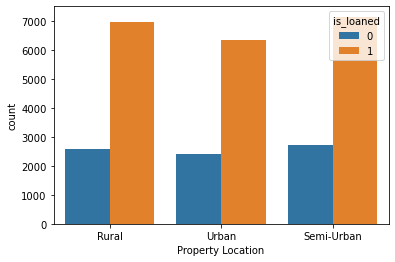

In [24]:
sns.countplot(x=df["Property Location"], hue=df["is_loaned"]);

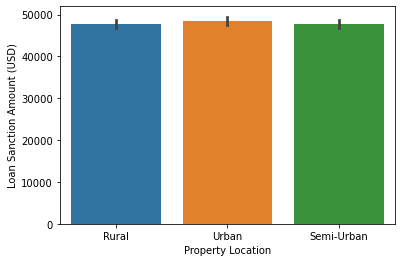

In [25]:
sns.barplot(x='Property Location', y='Loan Sanction Amount (USD)', data=df, estimator=np.mean);

Semua lokasi properti memiliki peluang pinjaman yang sama dan secara rata-rata jumlah pinjamnnya sama.

#### 4. Harga properti dan pengaruhnya terhadap persetujuan hutang bank

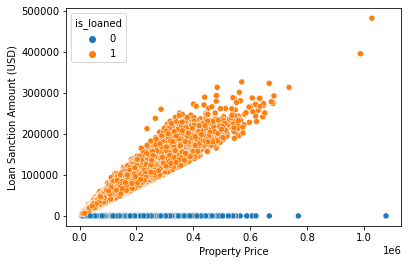

In [26]:
sns.scatterplot(data=df, x="Property Price", y="Loan Sanction Amount (USD)", hue='is_loaned');

Harga properti berelasi dengan pinjaman yang disetujui bank, namun tidak selalu berkorelasi.

### Insights B:
- Karakteristik properti seperti umur, tipe, dan lokasi properti tidak menjadi bahan pertimbangan bank dalam menentukan pinjaman
- Harga properti adalah salah satu faktor pertimbangan bank dalam memutuskan kredit
- Semakin tinggi harga properti, semakin tinggi juga pinjaman yang diberikan bank

### C.  Analisis Karakteristik Nasabah dan Persetujuan Pinjaman

#### 1. Pengaruh umur nasabah terhadap pinjaman yang disetujui bank
Kategori umur 15-24 (early working age), 25-54 (prime working age), 55-64 (mature working age), di atas 65 (elderly)

In [27]:
df['Age Group'] = pd.cut(x=df['Age'], bins=[15, 24, 54, 64, 90], labels=['Early', 'Prime', 'Mature', 'Elderly'])

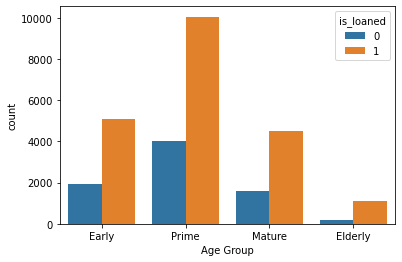

In [28]:
sns.countplot(x=df["Age Group"], hue=df["is_loaned"]);

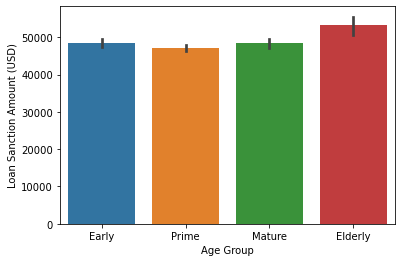

In [29]:
sns.barplot(x='Age Group', y='Loan Sanction Amount (USD)', data=df, estimator=np.mean);

Kategori umur Prime mendominasi nasabah yang mengajukan pinjaman dan paling memungkinkan untuk diberi pinjaman. Sedangkan secara rata-rata jumlah pinjaman yang diberikan bank paling banyak adalah pada nasabah Elderly.

#### 2. Pengaruh pendapatan nasabah terhadap pinjaman yang disetujui bank

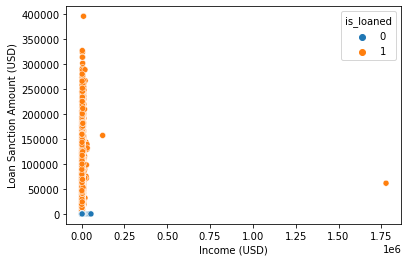

In [30]:
sns.scatterplot(data=df, x="Income (USD)", y="Loan Sanction Amount (USD)", hue='is_loaned');

In [31]:
# Terdapat 2 data outliers, dijadikan sebagai batasan
df = df[df['Income (USD)'] < 120000]

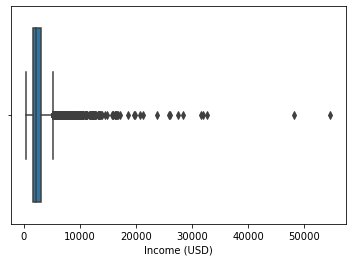

In [32]:
sns.boxplot(x=df['Income (USD)']);

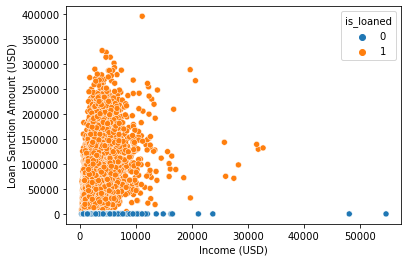

In [33]:
sns.scatterplot(data=df, x="Income (USD)", y="Loan Sanction Amount (USD)", hue='is_loaned');

Pendapatan nasabah merupakan faktor pertimbangan keputusan bank dalam menentukan kredit.

#### 3. Kestabilan pendapatan nasabah dan keputusan pinjaman bank

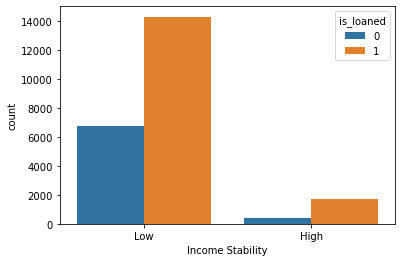

In [34]:
sns.countplot(x=df["Income Stability"], hue=df["is_loaned"]);

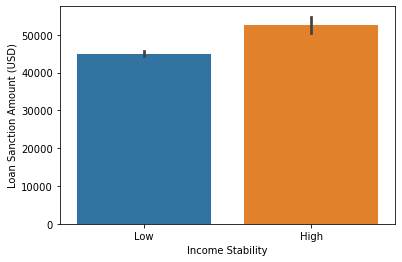

In [35]:
sns.barplot(x='Income Stability', y='Loan Sanction Amount (USD)', data=df, estimator=np.mean);

Data nasabah dengan Income Stability Low lebih banyak dari Income Stability High. Pada nasabah dengan Income Stability Low, bank tetap memberikan pinjaman namun secara rata-rata nasabah dengan Income Stability High mendapat pinjaman lebih besar.

#### 4. Profesi nasabah dan pinjaman yang diberikan bank

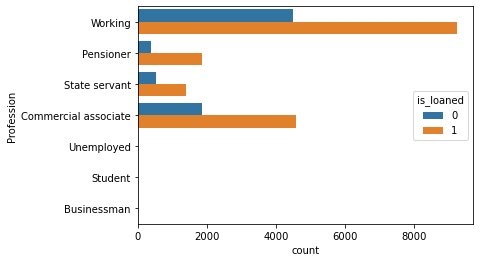

In [36]:
sns.countplot(y=df["Profession"], hue=df["is_loaned"]);

In [37]:
(pd.crosstab(index=df['Profession'], columns=df['is_loaned'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_loaned,0,1,Jumlah
Profession,,,
Businessman,0.00,0.01,0.01
Commercial associate,7.66,18.83,26.49
Pensioner,1.52,7.62,9.14
State servant,2.16,5.77,7.93
Student,0.00,0.00,0.00
Unemployed,0.00,0.00,0.00
Working,18.47,37.96,56.43
Jumlah,29.82,70.18,100.00


Data profesi nasabah didominasi 'Working' dengan 56.43% dari semua nasabah, dan tidak semua mendapatkan pinjaman. Data profesi nasabah ini akan dikelompokkan lagi sesuai dengan besaran persentase. Profesi yang hanya mempunyai proporsi 0% akan dikelompokkan menjadi grup 'Others'

In [38]:
# Regroup to Working, Pensioner, State servant, Commercial associate and Others
def recat_profession(x):
    if x in ['Working', 'Pensioner', 'State servant', 'Commercial associate']:
        return x
    else:
        return 'Others'

In [39]:
df['Profession']=df['Profession'].apply(recat_profession)
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),is_loaned,Age Group
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,NaN,746,1933.05,4,Rural,1,119933.46,54607.18,1,Mature
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98,1,Prime
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43,1,Elderly
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28,1,Prime
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,...,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57,1,Mature


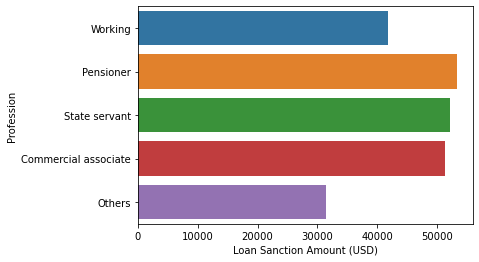

In [40]:
sns.barplot(x='Loan Sanction Amount (USD)', y='Profession', data=df, estimator=np.mean, ci=None);

Secara rata-rata, nasabah Pensioner mendapatkan jumlah pinjaman paling banyak, diikuti oleh State Servant dan Commercial Associate. Data profesi nasabah dapat dijadikan pertimbangan bank dalam memberi pinjaman.

#### 5. Tipe kepegawaian dengan keputusan pinjaman bank

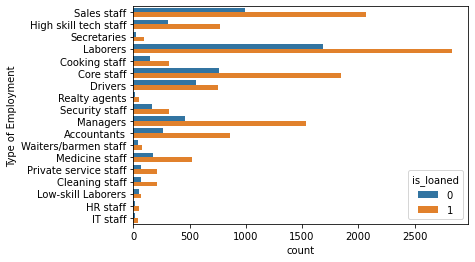

In [41]:
sns.countplot(y=df["Type of Employment"], hue=df["is_loaned"]);

In [42]:
(pd.crosstab(index=df['Type of Employment'], columns=df['is_loaned'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_loaned,0,1,Jumlah
Type of Employment,,,
Accountants,1.41,4.64,6.05
Cleaning staff,0.38,1.14,1.52
Cooking staff,0.80,1.71,2.51
Core staff,4.14,10.02,14.16
Drivers,3.00,4.06,7.07
HR staff,0.08,0.25,0.33
High skill tech staff,1.65,4.18,5.83
IT staff,0.09,0.22,0.31
Laborers,9.14,15.37,24.51


Data tipe kepegawaian nasabah didominasi 'Laborers' dengan 24.51% dari semua nasabah, dan tidak semua mendapatkan pinjaman. Data tipe kepegawaian nasabah ini akan dikelompokkan lagi sesuai dengan besaran persentase. Tipe kepegawaian yang hanya mempunyai proporsi di bawah 10% akan dikelompokkan menjadi grup 'Others'

In [43]:
# Regroup to Laborers, Sales staff, Core staff, Managers, Others
def recat_employ(x):
    if x in ['Laborers', 'Sales staff', 'Core staff', 'Managers']:
        return x
    else:
        return 'Others'

In [44]:
df['Type of Employment']=df['Type of Employment'].apply(recat_employ)

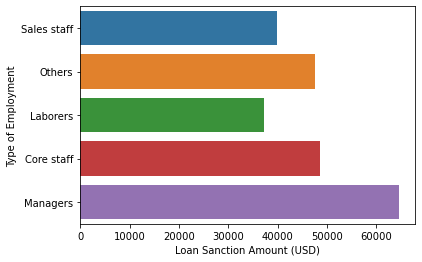

In [45]:
sns.barplot(x='Loan Sanction Amount (USD)', y='Type of Employment', data=df, estimator=np.mean, ci=None);

Walaupun nasabah Laborers mendominasi nasabah yang diberikan pinjaman, namun nasabah bertipe Managers secara rata-rata mendapatkan jumlah pinjaman paling banyak. Data tipe kepegawaian nasabah dapat dijadikan pertimbangan bank dalam memberi pinjaman.

#### 6. Lokasi nasabah dan keputusan pinjaman bank

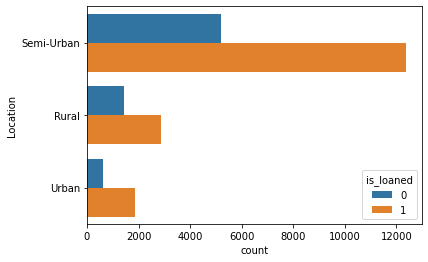

In [46]:
sns.countplot(y=df["Location"], hue=df["is_loaned"]);

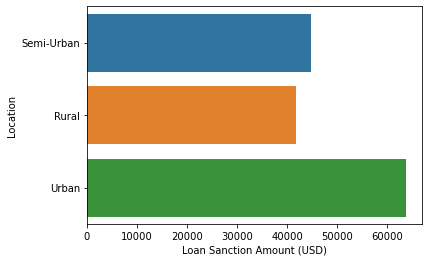

In [47]:
sns.barplot(x='Loan Sanction Amount (USD)', y='Location', data=df, estimator=np.mean, ci=None);

Walaupun nasabah dengan lokasi Semi-Urban mendominasi nasabah yang diberikan pinjaman, namun nasabah berlokasi Urban secara rata-rata mendapatkan jumlah pinjaman paling banyak. Data lokasi nasabah dapat dijadikan pertimbangan bank dalam memberi pinjaman.

#### 7. Loan Amount Request (USD) dan pinjaman yang diberikan bank

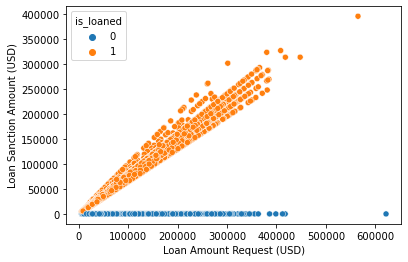

In [48]:
sns.scatterplot(data=df, x="Loan Amount Request (USD)", y="Loan Sanction Amount (USD)", hue='is_loaned');

Ada korelasi antara jumlah pinjaman yang diajukan nasabah dengan jumlah pinjaman yang diberikan bank. Namun hal ini tidak berlaku untuk semua nasabah.

#### 8. Expense Type 1 (Pinjaman dengan kolateral/ Secure Loan)

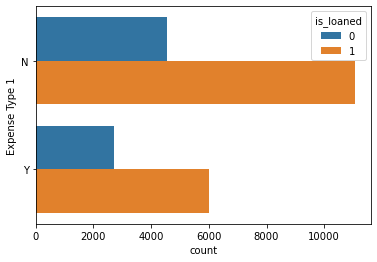

In [49]:
sns.countplot(y=df["Expense Type 1"], hue=df["is_loaned"]);

#### 9. Expense Type 2 (Pinjaman tanpa kolateral/ Unsecure Loan)

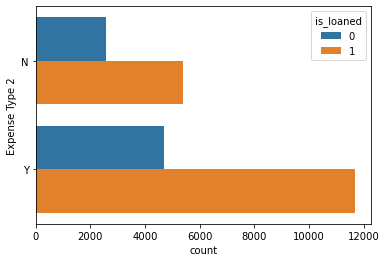

In [50]:
sns.countplot(y=df["Expense Type 2"], hue=df["is_loaned"]);

Data Expense Type 1 dan Expense Type 2 bersifat kebalikan, baik nasabah yang memberikan jaminan dan tidak memberikan jaminan, tidak menjadi pertimbangan bank dalam memberikan pinjaman.

#### 10. Jumlah pertanggungan nasabah dan keputusan pinjaman bank

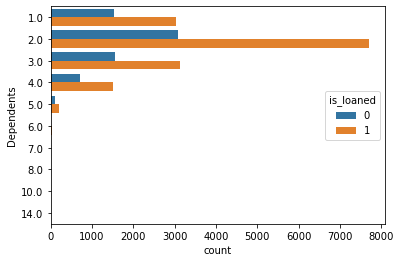

In [51]:
sns.countplot(y=df["Dependents"], hue=df["is_loaned"]);

In [52]:
(pd.crosstab(index=df['Dependents'], columns=df['is_loaned'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_loaned,0,1,Jumlah
Dependents,,,
1.0,6.78,13.39,20.17
2.0,13.62,34.12,47.74
3.0,6.90,13.81,20.70
4.0,3.11,6.69,9.80
5.0,0.49,0.86,1.35
6.0,0.07,0.12,0.19
7.0,0.01,0.02,0.03
8.0,0.00,0.00,0.00
10.0,0.00,0.00,0.00


Data jumlah tertanggung nasabah akan dikelompokkan lagi sesuai dengan besaran persentase. Jumlah tertanggung yang lebih dari 4 orang, akan dikelompokkan menjadi data '5'

In [53]:
# Regroup
def recat_depend(x):
    if x in [1,2,3,4]:
        return x
    else:
        return 5

In [54]:
df['Dependents']=df['Dependents'].apply(recat_depend)

In [55]:
(pd.crosstab(index=df['Dependents'], columns=df['is_loaned'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_loaned,0,1,Jumlah
Dependents,,,
1.0,6.30,12.46,18.76
2.0,12.66,31.74,44.40
3.0,6.41,12.84,19.25
4.0,2.90,6.22,9.12
5.0,1.54,6.93,8.47
Jumlah,29.82,70.18,100.00


Data jumlah tertanggung nasabah dapat menjadi pertimbangan bank dalam memutuskan kredit.

#### 11. Credit Score dan keputusan pinjaman bank
Klasifikasi FICO credit scores (skoring yang umum digunakan bank USA)
- lower than 580 as very poor, 
- 580–669 as fair, 
- 670–739 as good, 
- 740–799 as very good, and 
- 800–850 as exceptional.

In [56]:
df['Credit Score'] = pd.cut(x=df['Credit Score'], bins=[580, 669, 739, 799, 850], labels=['Poor', 'Fair', 'Good', 'Exceptional'])

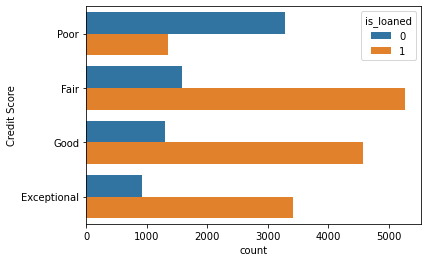

In [57]:
sns.countplot(y=df["Credit Score"], hue=df["is_loaned"]);

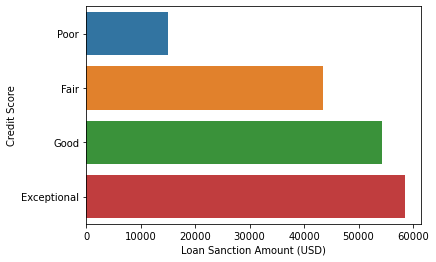

In [58]:
sns.barplot(x='Loan Sanction Amount (USD)', y='Credit Score', data=df, estimator=np.mean, ci=None);

Credit Score nasabah mempengaruhi keputusan bank dalam memberikan pinjaman.

#### 12. No. of Defaults (histori gagal bayar nasabah)

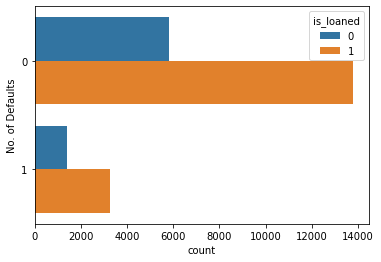

In [59]:
sns.countplot(y=df["No. of Defaults"], hue=df["is_loaned"]);

Nasabah yang belum pernah ada histori gagal bayar (No. of Defaults = 0), lebih mungkin diberikan pinjaman oleh bank daripada yang pernah gagal bayar (No. of Deafults = 1). Data ini mempengaruhi keputusan bank dalam memberikan pinjaman

#### 13. Kepemilikan kartu kredit dan keputusan bank memberikan pinjaman

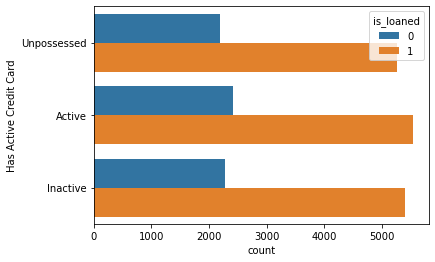

In [60]:
sns.countplot(y=df["Has Active Credit Card"], hue=df["is_loaned"]);

Status kepemilikan kartu kredit tidak menjadi pertimbangan bank dalam memberikan pinjaman.

#### 14. Status Co-Applicant dan keputusan bank memberikan pinjaman

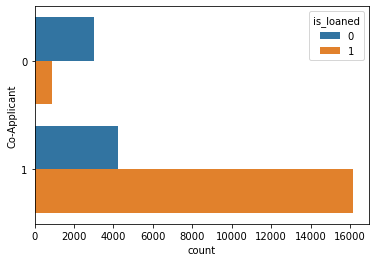

In [61]:
sns.countplot(y=df["Co-Applicant"], hue=df["is_loaned"]);

Nasabah yang pengajuannya ada Co-Applicant (pihak penanggung jawab lain) lebih dipercaya bank sehingga bank memberikan pinjaman.

### Insights C:
- Karakteristik umur, pendapatan, stabilitas pendapatan, profesi, tipe kepegawaian, lokasi, jumlah pengajuan pinjaman, pertanggungan, credit score, histori gagal bayar, dan adanya co-applicant nasabah mempengaruhi pinjaman yang disetujui bank

### Regression Model
- menggunakan kolom fitur `Property Price`,`Age Group`, `Income (USD)`,`Income Stability`, `Profession`, `Type of Employment`, `Location`, `Loan Amount Request (USD)`, `Dependents`, `Credit Score`, `No. of Defaults`, `Co-Applicant` dan kolom target `Loan Sanction Amount (USD)`
- Limitasi projek:
    - Model regresi yang dibuat tidak memprediksi nasabah yang tidak diberikan pinjaman oleh bank
    - `Income (USD)` tidak melebihi USD 120000 karena akan menyebabkan bias

In [62]:
df_1 = df[df['Loan Sanction Amount (USD)'] > 0]
df_1.shape

(17059, 26)

In [63]:
df_1 = df_1[['Property Price','Age Group', 'Income (USD)','Income Stability', 'Profession', 'Type of Employment', 'Location', 'Loan Amount Request (USD)','Dependents','Credit Score','No. of Defaults','Co-Applicant', 'Loan Sanction Amount (USD)']]
df_1.head()

,Property Price,Age Group,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Loan Sanction Amount (USD)
0,119933.46,Mature,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,3.0,Exceptional,0,1,54607.18
1,54791.00,Prime,4952.91,Low,Working,Others,Semi-Urban,46837.47,1.0,Good,0,1,37469.98
2,72440.58,Elderly,988.19,High,Pensioner,Others,Semi-Urban,45593.04,1.0,Exceptional,0,0,36474.43
4,208567.91,Prime,2614.77,Low,Working,Others,Semi-Urban,113858.89,5.0,Good,1,1,74008.28
5,43146.82,Mature,1234.92,Low,State servant,Others,Rural,34434.72,2.0,Fair,1,1,22382.57


Model machine learning tidak dapat bekerja dengan baik jika data yang digunakan masih memiliki nilai null sehingga dilakukan pengecekan dan penggantian nilai null.

In [64]:
df_1.isna().sum()

Property Price                   0
Age Group                        0
Income (USD)                     0
Income Stability              1004
Profession                       0
Type of Employment               0
Location                         0
Loan Amount Request (USD)        0
Dependents                       0
Credit Score                  2433
No. of Defaults                  0
Co-Applicant                     0
Loan Sanction Amount (USD)       0
dtype: int64

In [65]:
loan1Desc = []

for i in df_1.columns:
    loan1Desc.append([
        i,
        df_1[i].dtypes,
        df_1[i].isna().sum(),
        round((df_1[i].isna().sum() / len(df_1)) * 100, 2),
        df_1[i].nunique(),
        df_1[i].drop_duplicates().sample(2).values
    ])

In [66]:
pd.DataFrame(data = loan1Desc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,Property Price,float64,0,0.00,17054,"[73608.29, 258692.34]"
1,Age Group,category,0,0.00,4,"['Elderly', 'Mature'] Categories (4, object): ..."
2,Income (USD),float64,0,0.00,16595,"[1598.34, 4869.36]"
3,Income Stability,object,1004,5.89,2,"[High, nan]"
4,Profession,object,0,0.00,5,"[Pensioner, Working]"
5,Type of Employment,object,0,0.00,5,"[Sales staff, Others]"
6,Location,object,0,0.00,3,"[Urban, Rural]"
7,Loan Amount Request (USD),float64,0,0.00,17056,"[128078.43, 65119.36]"
8,Dependents,float64,0,0.00,5,"[3.0, 2.0]"
9,Credit Score,category,2433,14.26,4,"[NaN, 'Poor'] Categories (4, object): ['Poor' ..."


#### Handle missing value in `Income Stability`

In [67]:
df_1[df_1.isna().any(axis=1)].head()

,Property Price,Age Group,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Loan Sanction Amount (USD)
18,118617.77,Elderly,1523.03,High,Pensioner,Others,Semi-Urban,66567.35,3.0,NaN,0,0,46597.14
25,47390.38,Mature,700.07,High,Pensioner,Others,Semi-Urban,38101.51,2.0,NaN,0,1,28576.13
30,45299.77,Prime,2478.54,Low,Working,Others,Semi-Urban,30195.97,1.0,NaN,0,1,24156.78
32,32580.57,Prime,2474.33,Low,Working,Laborers,Semi-Urban,17503.00,3.0,NaN,1,1,14002.40
33,41948.44,Early,1220.16,NaN,Working,Laborers,Semi-Urban,35595.86,3.0,Fair,0,1,24917.10


In [68]:
(pd.crosstab(index=df_1['Income Stability'], columns=df_1['Profession'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

Profession,Commercial associate,Others,Pensioner,State servant,Working,Jumlah
Income Stability,,,,,,
High,0.00,0.00,10.78,0.00,0.00,10.78
Low,26.86,0.01,0.00,8.27,54.09,89.22
Jumlah,26.86,0.01,10.78,8.27,54.09,100.00


Tabel menunjukkan bahwa Income Stability Low mendominasi data, sehingga data null akan digantikan dengan 'Low'

In [69]:
df_1['Income Stability'] = df_1['Income Stability'].fillna(df_1['Income Stability'].mode().iloc[0])

#### Handle missing value in `Credit Score`
Asumsi bahwa yang nasabah tidak ada Credit Score adalah nasabah yang belum pernah mempunyai credit history, dan secara default score < 500 yaitu 'poor'

In [70]:
values = {"Credit Score": "Poor"}
df_1 = df_1.fillna(value=values)

In [71]:
df_1.isna().sum()

Property Price                0
Age Group                     0
Income (USD)                  0
Income Stability              0
Profession                    0
Type of Employment            0
Location                      0
Loan Amount Request (USD)     0
Dependents                    0
Credit Score                  0
No. of Defaults               0
Co-Applicant                  0
Loan Sanction Amount (USD)    0
dtype: int64

Data sudah tidak memiliki nilai Null, maka akan dilanjutkan proses pembuatan data train dan test dengan metode Splitting data

In [72]:
df_1.dtypes

Property Price                 float64
Age Group                     category
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Dependents                     float64
Credit Score                  category
No. of Defaults                  int64
Co-Applicant                     int64
Loan Sanction Amount (USD)     float64
dtype: object

### Encoding Data Kategorik

In [73]:
df_1 = pd.get_dummies(df_1, columns=['Age Group', 'Credit Score', 'Income Stability', 'Profession', 'Type of Employment', 'Dependents' , 'Location'])

In [74]:
df_1.head()

,Property Price,Income (USD),Loan Amount Request (USD),No. of Defaults,Co-Applicant,Loan Sanction Amount (USD),Age Group_Early,Age Group_Prime,Age Group_Mature,Age Group_Elderly,...,Type of Employment_Others,Type of Employment_Sales staff,Dependents_1.0,Dependents_2.0,Dependents_3.0,Dependents_4.0,Dependents_5.0,Location_Rural,Location_Semi-Urban,Location_Urban
0,119933.46,1933.05,72809.58,0,1,54607.18,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,54791.00,4952.91,46837.47,0,1,37469.98,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,72440.58,988.19,45593.04,0,0,36474.43,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,208567.91,2614.77,113858.89,1,1,74008.28,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
5,43146.82,1234.92,34434.72,1,1,22382.57,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


### Splitting Data

In [75]:
X = df_1.drop(columns='Loan Sanction Amount (USD)')
y = df_1['Loan Sanction Amount (USD)']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=101)

In [77]:
print(X_train.shape, X_test.shape)

(13647, 33) (3412, 33)


Pembagian data testing dan training dengan proporsi 80% data training dan 20% data testing sehingga membagi dataframe menjadi 13647 baris data train dan 3412 baris data test

### Base Model Cross Validation
Cross Validation dilakukan untuk mengetahui skor kestabilan data dan model saat training dan testing. Langkah ini menggunakan empat macam Base Model Regression yakni K-Nearest Regressor, Support Vector Regression, Decision Tree Regressor dan Random Forest Regressor. Metric pengukuran yang akan dipakai adalah R square, Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE). Semakin rendah nilai MAE, MSE, dan RMSE menunjukkan akurasi lebih tinggi dari sebuah model regresi dan nilai R square yang tinggi juga tepat dijadikan patokan.

In [78]:
def Cross_Val(model,x,y,Nama):
    kf = KFold(n_splits=5)
    cv_r2 = cross_val_score(model, x, y, cv = kf, scoring='r2')
    cv_MAE = cross_val_score(model, x, y, cv = kf, scoring='neg_mean_absolute_error')
    cv_MSE = cross_val_score(model, x, y, cv = kf, scoring='neg_mean_squared_error')
    cv_RMSE = cross_val_score(model, x, y, cv = kf, scoring='neg_root_mean_squared_error')
    data={
        Nama + ' Cross-Validation (Mean)':[cv_r2.mean(),cv_MAE.mean(),cv_MSE.mean(),cv_RMSE.mean()],
        Nama + ' Cross-Validation (Standard Deviation)':[cv_r2.std(),cv_MAE.std(),cv_MSE.std(),cv_RMSE.std()]
    }
    df = pd.DataFrame(data,index=['R-Squared','MAE','MSE','RMSE']).T

    return df

#### Training

In [79]:
cv_KNN_tr=Cross_Val(KNeighborsRegressor(),X_train,y_train,'KNN Model Training').round(2)
cv_KNN_tr

,R-Squared,MAE,MSE,RMSE
KNN Model Training Cross-Validation (Mean),0.98,-4489.79,-47929422.61,-6911.62
KNN Model Training Cross-Validation (Standard Deviation),0.00,127.53,5609203.81,398.62


In [80]:
cv_SVR_tr=Cross_Val(SVR(),X_train,y_train,'SVR Model Training').round(2)
cv_SVR_tr

,R-Squared,MAE,MSE,RMSE
SVR Model Training Cross-Validation (Mean),0.02,-32202.95,-1.972037e+09,-44391.69
SVR Model Training Cross-Validation (Standard Deviation),0.01,589.76,1.055397e+08,1189.48


In [81]:
cv_DT_tr=Cross_Val(DecisionTreeRegressor(),X_train,y_train,'DT Model Training').round(2)
cv_DT_tr

,R-Squared,MAE,MSE,RMSE
DT Model Training Cross-Validation (Mean),0.97,-4529.85,-57648051.50,-7651.77
DT Model Training Cross-Validation (Standard Deviation),0.00,122.05,4874344.25,361.79


In [82]:
cv_RF_tr=Cross_Val(RandomForestRegressor(),X_train,y_train,'RF Model Training').round(2)
cv_RF_tr

,R-Squared,MAE,MSE,RMSE
RF Model Training Cross-Validation (Mean),0.98,-3571.14,-31559346.73,-5623.67
RF Model Training Cross-Validation (Standard Deviation),0.00,86.90,3968324.83,348.02


#### Testing

In [83]:
cv_KNN_ts=Cross_Val(KNeighborsRegressor(),X_test,y_test,'KNN Model Testing').round(2)
cv_KNN_ts

,R-Squared,MAE,MSE,RMSE
KNN Model Testing Cross-Validation (Mean),0.98,-4425.18,-44494443.66,-6666.79
KNN Model Testing Cross-Validation (Standard Deviation),0.00,82.06,2909213.18,219.97


In [84]:
cv_SVR_ts=Cross_Val(SVR(),X_test,y_test,'SVR Model Testing').round(2)
cv_SVR_ts

,R-Squared,MAE,MSE,RMSE
SVR Model Testing Cross-Validation (Mean),-0.04,-33428.95,-2.055331e+09,-45257.51
SVR Model Testing Cross-Validation (Standard Deviation),0.02,1712.47,2.373985e+08,2662.58


In [85]:
cv_DT_ts=Cross_Val(DecisionTreeRegressor(),X_test,y_test,'DT Model Testing').round(2)
cv_DT_ts

,R-Squared,MAE,MSE,RMSE
DT Model Testing Cross-Validation (Mean),0.97,-4606.65,-53508633.70,-7260.39
DT Model Testing Cross-Validation (Standard Deviation),0.00,179.77,4517502.72,268.80


In [86]:
cv_RF_ts=Cross_Val(RandomForestRegressor(),X_test,y_test,'RF Model Testing').round(2)
cv_RF_ts

,R-Squared,MAE,MSE,RMSE
RF Model Testing Cross-Validation (Mean),0.98,-3644.31,-30627782.95,-5560.13
RF Model Testing Cross-Validation (Standard Deviation),0.00,104.17,3428596.88,260.47


In [87]:
pd.concat((cv_KNN_tr,cv_KNN_ts, cv_SVR_tr, cv_SVR_ts, cv_DT_tr,cv_DT_ts, cv_RF_tr, cv_RF_ts))

,R-Squared,MAE,MSE,RMSE
KNN Model Training Cross-Validation (Mean),0.98,-4489.79,-4.792942e+07,-6911.62
KNN Model Training Cross-Validation (Standard Deviation),0.00,127.53,5.609204e+06,398.62
KNN Model Testing Cross-Validation (Mean),0.98,-4425.18,-4.449444e+07,-6666.79
KNN Model Testing Cross-Validation (Standard Deviation),0.00,82.06,2.909213e+06,219.97
SVR Model Training Cross-Validation (Mean),0.02,-32202.95,-1.972037e+09,-44391.69
SVR Model Training Cross-Validation (Standard Deviation),0.01,589.76,1.055397e+08,1189.48
SVR Model Testing Cross-Validation (Mean),-0.04,-33428.95,-2.055331e+09,-45257.51
SVR Model Testing Cross-Validation (Standard Deviation),0.02,1712.47,2.373985e+08,2662.58
DT Model Training Cross-Validation (Mean),0.97,-4529.85,-5.764805e+07,-7651.77
DT Model Training Cross-Validation (Standard Deviation),0.00,122.05,4.874344e+06,361.79


Dari keempat model yang diuji Cross Validation, model Random Forest adalah model yang paling tinggi skor MAE saat training dan testing dibanding model lain. Maka Random Forest akan dituning sehingga lebih baik hasil prediksinya.

In [88]:
def Eva_Matrix(model,x_train, x_test, y_train, y_test, Nama):
    Model = model.fit(x_train, y_train)
    y_pred_tr = Model.predict(x_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MSE_train = mean_squared_error(y_train, y_pred_tr)
    RMSE_train = np.sqrt(MSE_train)
    y_pred_ts = Model.predict(x_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MSE_test = mean_squared_error(y_test, y_pred_ts)
    RMSE_test = np.sqrt(MSE_test)
    eva_data = {
    "Training " + Nama : [R2_train, MAE_train, MSE_train, RMSE_train],
    "Testing " + Nama : [R2_test, MAE_test, MSE_test, RMSE_test],
    }
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE']).T
    
    return df

In [89]:
df_RF = Eva_Matrix(RandomForestRegressor(),
                    X_train, X_test, y_train, y_test,
                    ' Base Random Forest')
df_RF.round(2)

,R2,MAE,MSE,RMSE
Training Base Random Forest,1.00,1319.85,4421296.84,2102.69
Testing Base Random Forest,0.99,3480.32,28684587.64,5355.80


In [90]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyper Parameter Tuning di Model Random Forest

In [91]:
param_RandomForest = {
    'max_depth' : range(10, 100, 10),
    'n_estimators' : range(10, 100, 5)
}

In [92]:
RF_random = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions = param_RandomForest,
               n_iter = 50, cv = 5, verbose=2, random_state=35, n_jobs = -1, scoring='neg_mean_absolute_error')

In [93]:
RF_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(10, 100, 10),
                                        'n_estimators': range(10, 100, 5)},
                   random_state=35, scoring='neg_mean_absolute_error',
                   verbose=2)

In [94]:
print(RF_random.best_estimator_, RF_random.best_score_)

RandomForestRegressor(max_depth=10, n_estimators=95) -3530.018088317578


In [95]:
best_model = RF_random.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=95)

In [96]:
df_RF_Tuned = Eva_Matrix(best_model, X_train, X_test, y_train, y_test, 'Random Forest Tuned')
df_RF_Tuned

,R2,MAE,MSE,RMSE
Training Random Forest Tuned,0.992190,2705.034888,1.567847e+07,3959.605317
Testing Random Forest Tuned,0.985984,3438.287937,2.769715e+07,5262.808486


### Analisa Error
Analisa error dilakukan untuk mengetahui error (selisih antara data prediksi dengan data aktual), distribusi error dan rata-rata error sehingga dapat diketahui seberapa baik model memberikan prediksi.

#### Prediksi di data train

In [97]:
pred_train = best_model.predict(X_train)

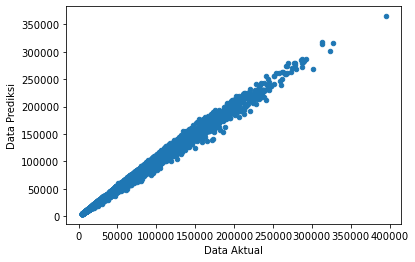

In [98]:
plt.scatter(y_train, pred_train, s=20) #s = size titik
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()

#### Prediksi di data test

In [99]:
pred_test = best_model.predict(X_test)

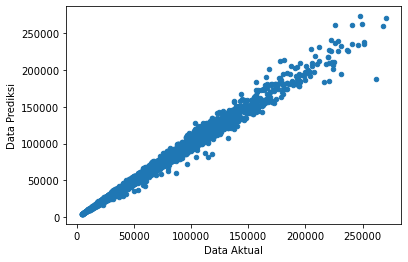

In [100]:
plt.scatter(y_test, pred_test, s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Data Prediksi')
plt.show()

In [101]:
Training_set = pd.concat([X_train, y_train], axis=1)

In [102]:
Testing_set = pd.concat([X_test, y_test], axis=1)

#### Analisa Error di Train

In [103]:
Training_set['loan_pred'] = pred_train

In [104]:
Training_set['Error'] = abs(Training_set['Loan Sanction Amount (USD)']-Training_set['loan_pred'])

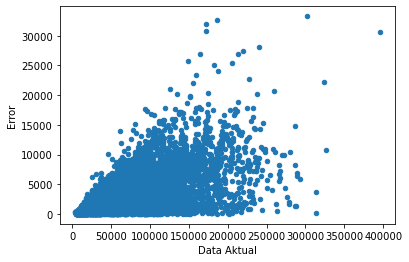

In [105]:
plt.scatter(Training_set['Loan Sanction Amount (USD)'], Training_set['Error'], s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Error')
plt.show()

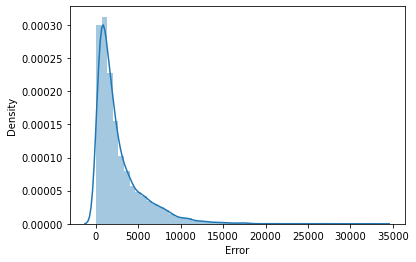

In [106]:
sns.distplot(Training_set['Error'])
plt.show()

In [107]:
Training_set['Error'].mean()

2705.0348882959083

In [108]:
Training_set.sort_values('Error', ascending=False).head(10)
#akan memunculkan 10 Data Training dengan Error tertinggi

,Property Price,Income (USD),Loan Amount Request (USD),No. of Defaults,Co-Applicant,Age Group_Early,Age Group_Prime,Age Group_Mature,Age Group_Elderly,Credit Score_Poor,...,Dependents_2.0,Dependents_3.0,Dependents_4.0,Dependents_5.0,Location_Rural,Location_Semi-Urban,Location_Urban,Loan Sanction Amount (USD),loan_pred,Error
4136,561815.83,6150.28,301457.20,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,301457.20,268179.301891,33277.898109
13497,267282.61,2013.92,186041.13,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,186041.13,153391.644308,32649.485692
27881,237218.21,2810.38,171970.41,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,171970.41,140020.709621,31949.700379
1686,304077.15,4217.50,172626.82,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,172626.82,141803.614223,30823.205777
4823,987770.87,11172.16,564812.49,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,395368.74,364777.406632,30591.333368
13806,337128.82,3944.96,267444.73,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,240700.26,212608.321494,28091.938506
29048,441354.99,3307.64,244676.38,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,220208.74,192767.485014,27441.254986
23782,216791.69,3085.66,164926.89,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,164926.89,137947.588411,26979.301589
6151,237007.55,1839.95,212792.53,0,1,0,0,1,0,1,...,1,0,0,0,0,1,0,212792.53,185837.928582,26954.601418
13624,265656.59,2301.48,166145.71,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,149531.14,123808.714820,25722.425180


#### Analisa Error di Test

In [114]:
Testing_set = pd.concat([X_test, y_test], axis=1)

In [115]:
Testing_set['loan_pred'] = pred_test

In [116]:
Testing_set['Error'] = abs(Testing_set['Loan Sanction Amount (USD)']-Testing_set['loan_pred'])

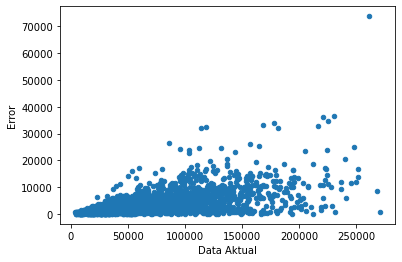

In [117]:
plt.scatter(Testing_set['Loan Sanction Amount (USD)'], Testing_set['Error'], s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Error')
plt.show()

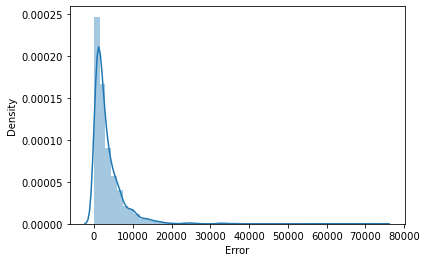

In [118]:
sns.distplot(Testing_set['Error'])
plt.show()

In [120]:
print('Rata-rata error: ', Testing_set['Error'].mean())

Rata-rata error:  3438.287936699899


In [121]:
print('Presentase error dengan MAPE (Mean Absolute Percentage Error)', mean_absolute_percentage_error(y_test, pred_test))

Presentase error dengan MAPE (Mean Absolute Percentage Error) 0.05130027222052649


### Kesimpulan
1. Keputusan pinjaman oleh bank dapat diprediksi dengan machine learning, dalam proyek ini menggunakan model regresi untuk memprediksi jumlah pinjaman yang akan diberikan pada nasabah sesuai kriteria-kriteria
2. Model machine learning dapat menjadi support untuk membuat keputusan pinjaman secara cepat sehingga mengurangi expense saat proses credit analysis tiap nasabah
3. Model yang tepat digunakan dalam proyek ini adalah model Random Forest Regression dengan rata-rata error 2705 saat training dan 3438 saat testing dengan persentase error 5.13%
4. Rekomendasi untuk proyek selanjutnya:
    - Membuat model klasifikasi untuk memprediksi nasabah yang akan mendapat pinjaman lalu membuat model regresi untuk memprediksi jumlah pinjamannya
    - Menghindari human error saat input data sehingga tidak ada nilai negatif
    - Mengkaji ulang produk kredit yang dipasarkan harus sesuai dengan kriteria nasabah yang ditargetkan, misal sesuai pendapatan dan stabilitas pendapatan. Sehingga produk kredit tersebut tepat sasaran dan tidak menimbulkan bias ketika menggunakan model prediksi.